# PCA ( Principal component analysis)

# PCA on Olevitti images

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [7]:
olive = datasets.fetch_olivetti_faces()
olive.keys()


dict_keys(['data', 'images', 'target', 'DESCR'])

In [9]:
olive['data'].shape

(400, 4096)

In [10]:
olive['images'].shape

(400, 64, 64)

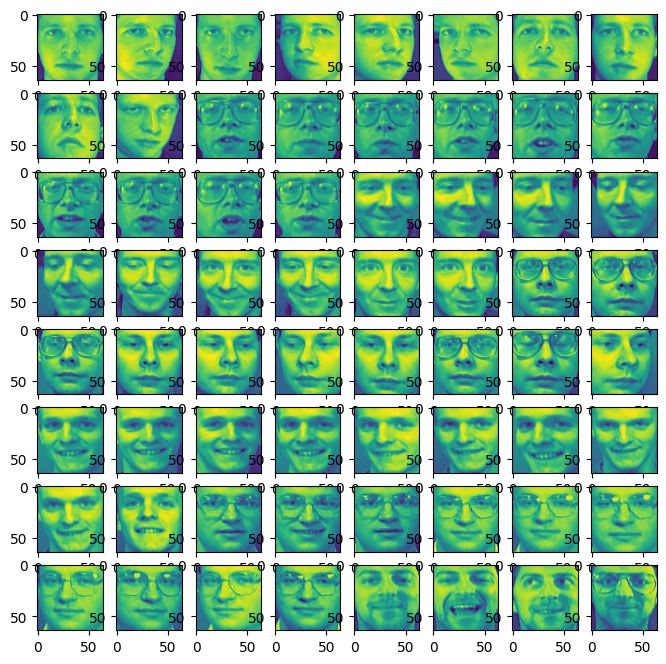

In [19]:
fig = plt.figure(figsize = (8, 8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(olive.images[i])
plt.show()

In [22]:
x = olive.data
y = olive.target
x.shape

(400, 4096)

In [23]:
pca = PCA()
pca.fit(x)

PCA()

In [25]:
pca.components_.shape

(400, 4096)

##### Now, we will decide the value of 'k' on the basis of amount of variance we want to reatain

In [32]:
k = 0
total = sum(pca.explained_variance_)
current_sum = 0
while current_sum/total  < 0.95:
    current_sum += pca.explained_variance_[k]
    k += 1
k

123

#### Thus, by keeping 123 components from 4096, we can retain 95% of variance

In [36]:
pca = PCA(n_components=k, whiten = True)
transformed_data = pca.fit_transform(x)
transformed_data.shape

(400, 123)

#### Reproducing the images

In [37]:
# Using inverse_transform to get original data's approximation
x_approx = pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

In [38]:
x_approx_image = x_approx.reshape((400, 64, 64))

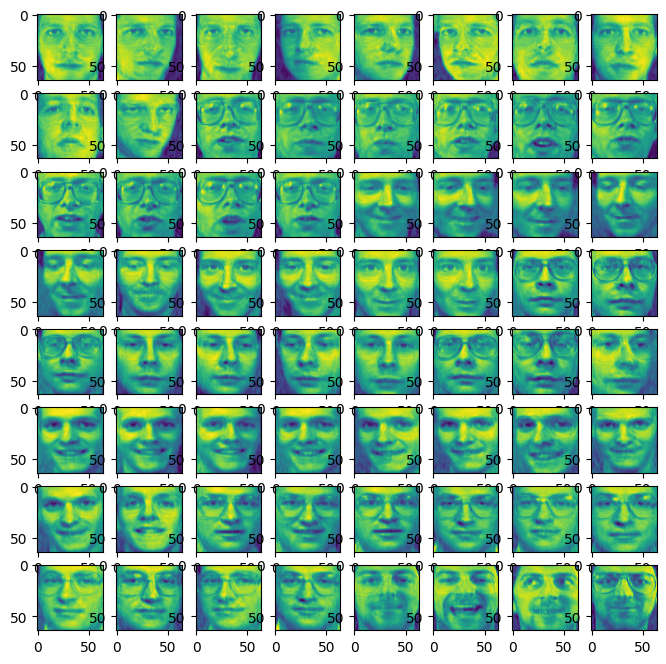

In [40]:
fig = plt.figure(figsize = (8, 8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(x_approx_image[i])
plt.show()